In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib
import HTC
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
# Load the serialized output from the simulation
output=pickle.load(open('weight_100run_6000time_0-0to0-31tc_0_20_50_100_150_200_300.bin','rb'))
attempts=pickle.load(open('weight_100run_6000time_0-0to0-31tc_0_20_50_100_150_200_300_attempts.bin', 'rb'))

In [3]:
len(output[0])

1

In [4]:
n_attempts=len(attempts)
attempts

{0: 1, 20: 10, 50: 10, 100: 10, 150: 10, 200: 10, 300: 10}

In [5]:
# Take the mean of the different attempts with the same connectome (as suggested by Giacomo)
a_f=np.zeros((n_attempts,len(output[0][0]['activity']) ))
sigma_a_f=np.zeros((n_attempts,len(output[0][0]['sigma_activity']) ))
s1_f=np.zeros((n_attempts,len(output[0][0]['s1']) ))
s2_f=np.zeros((n_attempts,len(output[0][0]['s2']) ))





for j in range(len(output)):
    # The temporary containers for the simulated data
    a=np.zeros(((len(output[j])),len(output[j][0]['activity'])))
    sigma_a=np.zeros(((len(output[j])),len(output[j][0]['sigma_activity'])))
    s1=np.zeros((len(output[j]),len(output[j][0]['s1'])))
    s2=np.zeros((len(output[j]),len(output[j][0]['s2'])))
    for i in range(len(output[j])):
        a[i]=output[j][i]['activity']
        sigma_a[i]=output[j][i]['sigma_activity']
        s1[i]=output[j][i]['s1']
        s2[i]=output[j][i]['s2']
        
    a_f[j]=np.mean(a, axis=0)
    sigma_a_f[j]=np.mean(sigma_a, axis=0)
    s1_f[j]=np.mean(s1, axis=0)
    s2_f[j]=np.mean(s2, axis=0)


In [6]:
# Plot all the interesting observables
#fig,ax=plt.subplots(2,2, figsize=(15,15))

#colormap = plt.cm.jet #nipy_spectral, Set1,Paired   
#colors = [colormap(i) for i in np.linspace(0.4, 1,len(ax1.lines))]

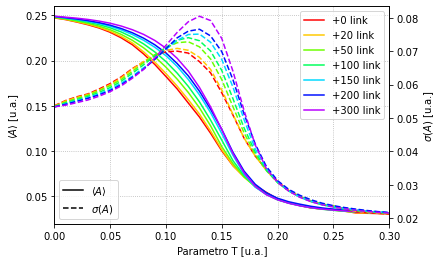

In [17]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)


for i,j in enumerate(attempts):
    ax1.plot(output[0][0]['tc'],a_f[i], label='+'+str(j)+' link')#, lw=0.5)
    #ax1.scatter(output[0][0]['tc'],a_f[i])#, label='+'+str(j)+' link')


colormap = plt.cm.hsv #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.0, 0.8,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])

ax2 = ax1.twinx()
    
for i,j in enumerate(attempts):
    ax2.plot(output[0][0]['tc'],sigma_a_f[i], label='+'+str(j)+' link', linestyle='dashed')
    
    
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])


ax1.legend()
plt.xlim(0,0.3)
ax1.grid(linestyle='dotted')
ax1.set_xlabel('Parametro T [u.a.]')
ax1.set_ylabel(r'$\langle A\rangle$ [u.a.]')
ax2.set_ylabel(r'$\sigma (A)$ [u.a.]')

legend_elements = [Line2D([0], [0], color='black', label=r'$\langle A\rangle$'),
                   Line2D([0], [0], ls='dashed', color='black', label=r'$\sigma(A)$')]
ax2.legend(handles=legend_elements, loc='lower left')


#plt.savefig('../Figure/Simulazione/Addw/a_sa.pdf', bbox_inches='tight')
plt.show()

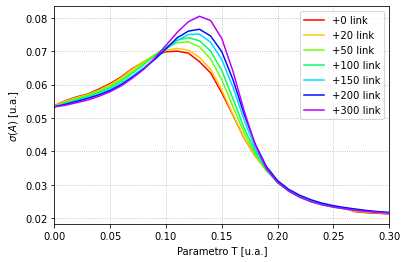

In [8]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)


for i,j in enumerate(attempts):
    plt.plot(output[0][0]['tc'],sigma_a_f[i], label='+'+str(j)+' link')
    
    
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
    
plt.legend()
plt.grid(linestyle='dotted')
plt.xlabel('Parametro T [u.a.]')
plt.xlim(0,0.3)
plt.ylabel(r'$\sigma (A)$ [u.a.]')
plt.savefig('../Figure/Simulazione/Addw/sa.pdf', bbox_inches='tight')

plt.show()

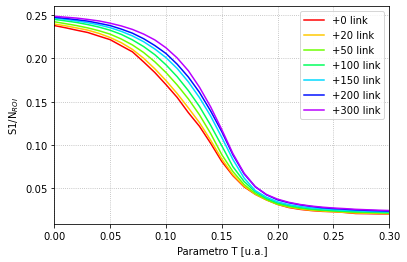

In [15]:

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

for i,j in enumerate(attempts):
    plt.plot(output[0][0]['tc'],s1_f[i]/66, label='+'+str(j)+' link')
    
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
    
plt.legend()
plt.grid(linestyle='dotted')
plt.xlabel('Parametro T [u.a.]')
plt.ylabel(r'S1/N$_{ROI}$')
plt.xlim(0,0.3)
plt.savefig('../Figure/Simulazione/Addw/s1.pdf', bbox_inches='tight')

plt.show()

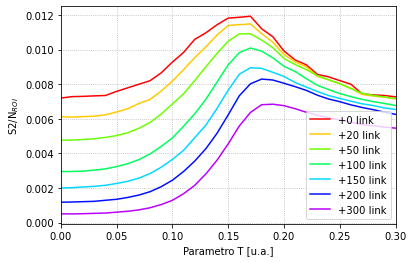

In [10]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)


for i,j in enumerate(attempts):
    plt.plot(output[0][0]['tc'],s2_f[i]/66, label='+'+str(j)+' link')
    
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
    
plt.legend()
plt.grid(linestyle='dotted')
plt.xlabel('Parametro T [u.a.]')
plt.ylabel(r'S2/N$_{ROI}$')
plt.xlim(0,0.3)
plt.savefig('../Figure/Simulazione/Addw/s2.pdf', bbox_inches='tight')

plt.show()

In [11]:
rho_f=np.zeros((len(output),len(output[0][0]['tc'])))
chi_f=np.zeros((len(output),len(output[0][0]['tc'])))
rho=np.zeros((len(output[0]),len(output[0][0]['tc'])))
chi=np.zeros((len(output[0]),len(output[0][0]['tc'])))
for i in range(len(output)):
    rho,chi = HTC.rho_chi_added_weights( output[i], 'set')
    rho_f[i]=np.mean(rho,axis=0)
    chi_f[i]=np.mean(chi,axis=0)

/mnt/c/Users/berto/NotSync/GitHub/TesiTriennale/Code/Utilities.py:211: RuntimeWarning: invalid value encountered in true_divide
  chi[w, i] = np.sqrt(np.nansum((h_fmri-h_norm)**2/(h_fmri+h_norm)))


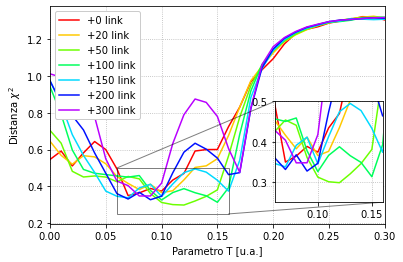

In [12]:
#fig,ax=plt.subplots(1,2, figsize=(15,5))
#fig.suptitle('Elemets set to zero')

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

for i,j in enumerate(attempts):
    ax1.plot(output[0][0]['tc'], chi_f[i], label='+'+str(j)+' link')
    
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
    
plt.legend(loc=2, framealpha=1)
#plt.title('Chi')
plt.ylabel(r'Distanza $\chi^2$')
plt.xlabel('Parametro T [u.a.]')
plt.grid(linestyle='dotted')


left, bottom, width, height = [0.645, 0.2, 0.25, 0.35]
ax4 = fig1.add_axes([left, bottom, width, height])

for i,j in enumerate(attempts):
    ax4.plot(output[0][0]['tc'], chi_f[i], label='+'+str(j)+' link')
    
for i,j in enumerate(ax4.lines):
    j.set_color(colors[i])

ax4.set_xlim(0.06, 0.16)
ax4.set_ylim(0.25,0.50)
ax4.grid(True, linestyle='dotted')
#ax4.set_xticks([0.0,0.12])
ax4.set_yticks([0.30,0.40, 0.50])
ax4.grid(True, linestyle='dotted')
ax1.indicate_inset_zoom(ax4, edgecolor="black")
ax1.set_xlim(0,0.3)

plt.savefig('../Figure/Simulazione/Addw/chi.pdf', bbox_inches='tight')

plt.show()

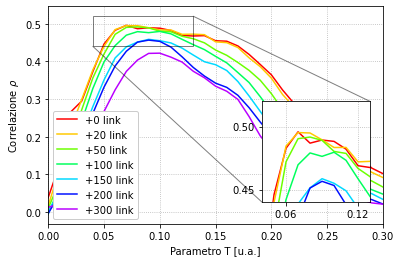

In [13]:
    
fig2 = plt.figure()
ax2 = fig2.add_subplot(111) 
    
for i,j in enumerate(attempts):
    ax2.plot(output[0][0]['tc'], rho_f[i], label='+'+str(j)+' link')
    
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])



#plt.title('Rho')
plt.ylabel(r'Correlazione $\rho$')
plt.xlabel('Parametro T [u.a.]')
plt.grid(linestyle='dotted')
plt.legend(loc=3, framealpha=1)


left, bottom, width, height = [0.62, 0.2, 0.25, 0.35]
ax3 = fig2.add_axes([left, bottom, width, height])

for i,j in enumerate(attempts):
    ax3.plot(output[0][0]['tc'], rho_f[i], label='+'+str(j)+' link')
    
for i,j in enumerate(ax3.lines):
    j.set_color(colors[i])
    
ax3.set_xlim(0.04,0.13)
ax3.set_ylim(0.44,0.52)
ax3.grid(True, linestyle='dotted')
ax3.set_xticks([0.06,0.12])
ax3.set_yticks([0.45, 0.50])
ax3.grid(True, linestyle='dotted')
ax2.indicate_inset_zoom(ax3, edgecolor="black")
ax2.set_xlim(0,0.3)


plt.savefig('../Figure/Simulazione/Addw/rho.pdf', bbox_inches='tight')

plt.show()

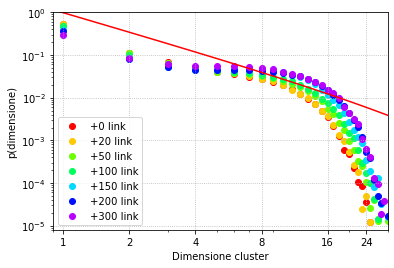

In [14]:
s_distributions=[HTC.get_sizes_distribution(output[i][0]['s_distrib']) for i in range(n_attempts)]

def fitter(x,alpha, gamma):
    return x**(-alpha)*np.exp(-x*gamma)

alpha,gamma=3/2,1/66
x_model=np.linspace(0.1,30, 100)
y_model=fitter(x_model, alpha, gamma)


fig, ax=plt.subplots()
for i,j in enumerate(attempts):
    ax.scatter(s_distributions[i][0],s_distributions[i][1] , color=colors[i], label='+'+str(j)+' link')

ax.plot(x_model, y_model, color='r')
    
ax.set_yscale("log")
ax.set_xscale("log")

ax.set_xlabel("Dimensione cluster")
ax.set_ylabel("p(dimensione)")
ax.set_xticks([1,2,4,8,16,24])
ax.set_xlim(0.9,30)
ax.set_ylim(0.8e-5,1)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.legend()
plt.grid(linestyle='dotted')
plt.savefig('../Figure/Simulazione/Addw/add_w_s_distrib.pdf', bbox_inches='tight')
plt.show()

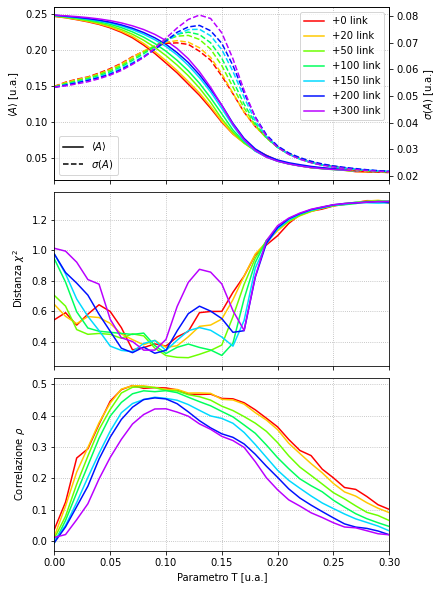

In [27]:
fig,ax = plt.subplots(ncols=1, nrows=3,figsize=(6,10), sharex=True)

for a in ax:
    #a.set_xticklabels([])
    #a.set_yticklabels([])
    #a.set_aspect('equal')
    a.grid(True, ls='dotted')
    
ax0,ax1,ax2=ax


for i,j in enumerate(attempts):
    ax0.plot(output[0][0]['tc'],a_f[i], label='+'+str(j)+' link')#, lw=0.5)
    #ax1.scatter(output[0][0]['tc'],a_f[i])#, label='+'+str(j)+' link')


colormap = plt.cm.hsv #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.0, 0.8,len(ax0.lines))]
for i,j in enumerate(ax0.lines):
    j.set_color(colors[i])

ax0_ = ax0.twinx()
    
for i,j in enumerate(attempts):
    ax0_.plot(output[0][0]['tc'],sigma_a_f[i], label='+'+str(j)+' link', linestyle='dashed')
    
    
for i,j in enumerate(ax0_.lines):
    j.set_color(colors[i])


ax0.legend()
#plt.xlim(0,0.3)
ax0.grid(linestyle='dotted')
#ax0.set_xlabel('Parametro T [u.a.]')
ax0.set_ylabel(r'$\langle A\rangle$ [u.a.]')
ax0_.set_ylabel(r'$\sigma (A)$ [u.a.]')

legend_elements = [Line2D([0], [0], color='black', label=r'$\langle A\rangle$'),
                   Line2D([0], [0], ls='dashed', color='black', label=r'$\sigma(A)$')]
ax0_.legend(handles=legend_elements, loc='lower left')












for i,j in enumerate(attempts):
    ax2.plot(output[0][0]['tc'], rho_f[i], label='+'+str(j)+' link')
    
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])


    
    
    
    
    
    
    
    
for i,j in enumerate(attempts):
    ax1.plot(output[0][0]['tc'], chi_f[i], label='+'+str(j)+' link')
    
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
    
#plt.legend(loc=2, framealpha=1)
#plt.title('Chi')
ax1.set_ylabel(r'Distanza $\chi^2$')
#ax1.set_xlabel('Parametro T [u.a.]')
ax1.grid(linestyle='dotted')


#left, bottom, width, height = [0.645, 0.2, 0.25, 0.35]
#ax4 = fig1.add_axes([left, bottom, width, height])

#for i,j in enumerate(attempts):
#    ax4.plot(output[0][0]['tc'], chi_f[i], label='+'+str(j)+' link')
    
#for i,j in enumerate(ax4.lines):
#    j.set_color(colors[i])

#ax4.set_xlim(0.06, 0.16)
#ax4.set_ylim(0.25,0.50)
#ax4.grid(True, linestyle='dotted')
#ax4.set_xticks([0.0,0.12])
#ax4.set_yticks([0.30,0.40, 0.50])
#ax4.grid(True, linestyle='dotted')
#ax1.indicate_inset_zoom(ax4, edgecolor="black")
ax1.set_xlim(0,0.3)


#plt.title('Rho')
ax2.set_ylabel(r'Correlazione $\rho$')
ax2.set_xlabel('Parametro T [u.a.]')
ax2.grid(linestyle='dotted')
#ax2.legend(loc=3, framealpha=1)


#left, bottom, width, height = [0.62, 0.2, 0.25, 0.35]
#ax3 = fig2.add_axes([left, bottom, width, height])

#for i,j in enumerate(attempts):
#    ax3.plot(output[0][0]['tc'], rho_f[i], label='+'+str(j)+' link')
    
#for i,j in enumerate(ax3.lines):
#    j.set_color(colors[i])
    
#ax3.set_xlim(0.04,0.13)
#ax3.set_ylim(0.44,0.52)
#ax3.grid(True, linestyle='dotted')
#ax3.set_xticks([0.06,0.12])
#ax3.set_yticks([0.45, 0.50])
#ax3.grid(True, linestyle='dotted')
#ax2.indicate_inset_zoom(ax3, edgecolor="black")
ax2.set_xlim(0,0.3)









plt.xlim(0,0.3)
#ax0_ = ax0.twinx()
#ax0.plot(output['tc'], output['activity'], color='b')
#ax0_.plot(output['tc'], output['sigma_activity'], color='r')

#ax0.set_xlabel('Parametro T [u.a.]', size=15)
#ax0.set_ylabel(r'$\langle A \rangle$ [u.a.]', color='b')
#ax0_.set_ylabel(r'$\sigma (A)$ [u.a.]', color='r')



#plt.xlim(0,0.3)
#ax1_ = ax1.twinx()
#ax1.plot(output['tc'], output['s1']/brain.n_neurons, color='b')
#ax1_.plot(output['tc'], output['s2']/brain.n_neurons, color='r')

#ax1.set_xlabel('Parametro T [u.a.]', size=15)
#ax1.set_ylabel(r'S1/$N_{ROI}$', color='b')
#ax1_.set_ylabel(r'S2/$N_{ROI}$', color='r')




#plt.xlim(0,0.3)
#ax2_ = ax2.twinx()
#ax2.plot(output['tc'], rho[0], color='b')
#ax2_.plot(output['tc'], chi[0], color='r')

#ax2.set_xlabel('Parametro T [u.a.]')
#ax2.set_ylabel(r'Correlazione $\rho$', color='b')
#ax2_.set_ylabel(r'Distanza $\chi^2$', color='r')
  
    

#ax0.set_ylim(0.025,0.25)
#ax0_.set_ylim(0.02,0.072)

#ax1.set_ylim(0.02,0.25)
#ax1_.set_ylim(0.005,0.012)

#ax2.set_ylim(0,0.5)
#ax2_.set_ylim(0.2,1.4)

fig.subplots_adjust(wspace=0.3, hspace=0.07)
plt.savefig('../FigurePowerPoint/add_w.svg', bbox_inches='tight', dpi=200)
plt.show()